In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Defining rayleigh

def rayleigh(x, A):
    return(np.dot(x.T,np.dot(A,x))/np.dot(x.T, x)).item()

A:  [[ 25  56  18]
 [ 56   0 -32]
 [ 18 -32  36]]

Top 5 Eigenvalues obtained from iteration method:
 [-58.76745696  48.41062667  71.35683029]
Top 5 Eigenvalues obtained from standard library:
 [-58.76745696  48.41062667  71.35683029]


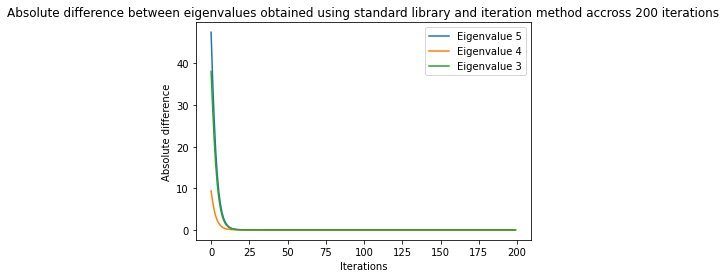

In [27]:
# Defining dimensions
n = 3

# Create nxn random matrix
A = np.random.rand(n,n)
A = np.random.randint(-10,10,n*n).reshape(3,3)

# Convert A into symmetric matrix
sym_A = A*A.T

# Checking if symmetric
(sym_A==sym_A.T).all()

A = sym_A
print("A: ", A)
# Starting with a basis (identity matrix)
V = np.identity(n)

# Obtaining QR factors of V
Q, R = np.linalg.qr(V)

# Initializing list to store history, in this case eigenvalues obtained by Rayleigh quotient on Q
hist = []
hist2 = []
# Number of iterations
iterations = 200

# Running loop
for i in range(iterations):
    
    # Dot product between matrix and Q
    W = np.dot(A,Q)
    
    # QR factorization on dot product
    Q, R = np.linalg.qr(W)
    
    # Initializing list for storing all eigenvalues at current iteration
    eigenvals = []
    
    # Loop for all columns of Q
    for j in range(Q.shape[1]):
        
        # Obtaining all eigenvalues using Rayliegh quotient from eigenvectors, i.e. columns of Q
        eigenvals.append(rayleigh(Q[:,j:j+1], A))
        
    # Appending eigenvalues corresponding to current iteration to hist
    hist.append(eigenvals)
    hist2.append(Q)

# Converting hist from list into numpy array
hist = np.array(hist)
hist2 = np.array(hist2)

# Top 5 eigenvalues of iterations (first the hist array columns are sorted as per last row, i.e. last iteration, then top 5 are sliced)
hist_5 = hist[:, hist[-1, :].argsort()][:,-5:]
print("\nTop 5 Eigenvalues obtained from iteration method:\n", hist_5[-1])

# Finding eigenvalues by standard library and sorting them
eigenvals = np.array(sorted(np.linalg.eig(A)[0]))
eigenvecs = np.linalg.eig(A)[1]

# Top 5 eigenvalues are sliced
eigenvals_5 = eigenvals[-5:]
print("Top 5 Eigenvalues obtained from standard library:\n", eigenvals_5)

# Creating convergence array to check the absolute differences between eigenvalues found by iteration method and standard library
convergence = np.abs(hist_5 - eigenvals_5)

# Visulizing convergence over iterations
plt.plot(convergence)
plt.legend(["Eigenvalue 5", "Eigenvalue 4", "Eigenvalue 3", "Eigenvalue 2", "Eigenvalue 1"])
plt.xlabel("Iterations")
plt.ylabel("Absolute difference")
plt.title("Absolute difference between eigenvalues obtained using standard library and iteration method accross "+str(iterations)+" iterations")
plt.show()

In [30]:
np.save("eigvecs3.npy", np.linalg.eig(A)[1])

In [35]:
np.save("hist3.npy", hist2[:100])